# Zpráva o provozu ETCS

In [1]:
from ipyfilechooser import FileChooser
from IPython.display import display, Markdown

file_chooser = FileChooser(
    "./data",
    filter_pattern="*xlsx",
    change_desc="Změnit",
    select_desc="Vybrat"
)

display(
    Markdown("Vyber soubor pro vygenerování reportu"),
    file_chooser
)

Vyber soubor pro vygenerování reportu

FileChooser(path='/home/jovyan/work/data', filename='', title='', show_hidden=False, select_desc='Vybrat', cha…

In [4]:
from column_names import *
from modes import *

In [5]:
from log import analyse
data = analyse(file_chooser.selected)

incidents = data[((data[MODE]==TR) & (data[PREV_MODE]!=data[MODE]) | data[CONNECTION_LOSS])]

##### Pro oblasti následujících RBC:

In [6]:
rbc_df = data[[RBC_ID, RBC_NAME]].drop_duplicates()
rbc_df.style.hide(axis="index")

RBC ETCS ID,Název RBC
62,Beroun
64,Ejpovice - Plzeň
71,Lanšperk - Lichkov
53,Praha-Uhříněves - Praha-Malešice
20,Kolín (mimo) – Praha-Běchovice


##### V období:

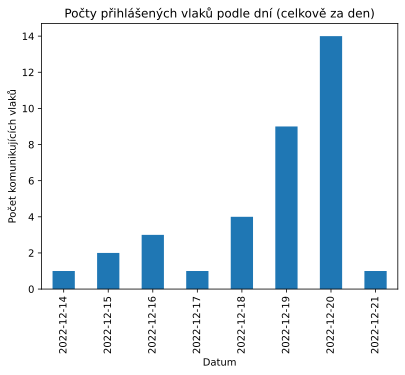

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

from matplotlib.ticker import MaxNLocator
import pandas as pd
from log import list_train_numbers

plt.close("all")
fig, ax = plt.subplots()
valid_number_filter = (data[TRAIN_NUMBER].between(1, 899999)) & (data[TRAIN_NUMBER].notnull())
resampled = data.loc[valid_number_filter].resample("D", on=TIME)
resampled[TRAIN_NUMBER].nunique().plot.bar(ax=ax)
ax.set_title("Počty přihlášených vlaků podle dní (celkově za den)")
ax.set_ylabel("Počet komunikujících vlaků")
ax.set_xlabel("Datum")
ax.set_xticklabels(pd.Series(resampled.groups.keys()).dt.strftime("%Y-%m-%d"))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))